## Finite Difference Method for Solving Schr&ouml;dinger Equation
### Infinite square well potential

Schr&ouml;dinger equation:

$$ 
-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi + U(x)\psi = E\psi$
$$

Use a dimensionless length parameter

$$
x^\prime = \frac{x}{a},
$$

where $a$ is a characteristic length scale of system.  In the case of the infinite
square well it's reasonable to let $a$ be the width of the potential. Using this
dimensionless $x^\prime$ the Schr&ouml;dinger equation becomes

$$
-\frac{d^2}{(dx^\prime)^2}\psi(x^\prime) + \frac{2ma^2}{\hbar^2}U(x^\prime) = 
\frac{2ma^2}{\hbar^2} E\psi(x^\prime)\quad \longrightarrow \quad 
-\frac{d^2}{(dx^\prime)^2}\psi(x^\prime) + \pi^2 U^\prime(x^\prime) 
=  \pi^2 E^\prime\psi(x^\prime),
$$

where dimesionless energy parameters are defined as

$$=
U^\prime \equiv \frac{U}{\frac{h^2}{8ma^2}}\quad \mbox{and}\quad 
E^\prime \equiv \frac{E}{\frac{h^2}{8ma^2}}
$$

Using these dimensionless parameters, the energies in an infinite square-box
potential are 

$$
E_m^\prime = m^2.
$$

I use a finite-difference method to turn the solving of Schr&ouml;dinger's into an eigenvalue problem.  Briefly, after discretizing $x$, ($x^\prime_j = x^\prime_0 + j\Delta$), an approximate version of Schr&ouml;dinger's equation can be written as 

$$
\frac{-\psi_{j+1} + 2\psi_j - \psi_{j-1}}{\pi^2\Delta^2} + \pi^2 U^\prime_j \psi_j = \pi^2 E^\prime u_j.
$$

This is an eigenvalue problem:

$$  
H_{ji}\psi_i = E^\prime \psi_j,
$$

where 


$$
H_{ji} = \left\{\begin{array}{cl}
                \frac{2}{\pi^2\Delta^2} & \mbox{for $i=j$} \\
                -\frac{1}{\pi^2\Delta^2} & \mbox{for  $i = j\pm 1$}\\
                0 & \mbox{otherwise}
                \end{array}\right.
$$

The eigenvalues give the energy of the states, and the eigenvectors are numerical
approximations of the wavefunctions.

[The method can be extended to more than one dimension and to situations with more than one particle. I have used this technique for a variety of one-dimensional potentials, and I have extended it to treat the two-dimensional harmonic oscillator, the hydrogen atom radial equation, and excited states of helium.) For a recent pedagogical discussion of the method, 
see <i>Matrix Numerov method for solving Schr&ouml;dinger's equation</i>,
Mohandas Pillai, Joshua Goglio, and Thad G. Walker, Am. J. Phys. <b>80</b>, 1017 (2012)]



Marty Ligare

In [23]:
import numpy as np
from scipy import linalg

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

In [3]:
def u2(x):
    '''Infinite square well potential'''
    return 0

In [14]:
xl = 0      # Left endpoint
xr = 1      # Right endpoint
n = 1000     # Number of intervals between xl and xr
dim = n - 1 # Number of internal points 
delta = (xr-xl)/n
x = np.linspace(xl,xr,n+1)

### Fill Hamiltonian

In [15]:
h = np.zeros((dim,dim),float)

for i in range(len(h)-1):
        h[i,i+1] = h[i+1,i] = -1/(np.pi*delta)**2  # Off-diagonal elements

for i in range(len(h)):
        h[i,i] = 2./(np.pi*delta)**2 + u2(x[i+1])  # Diagonal elements

vals, vecs = linalg.eigh(h)      # Note: eigenvectors in columns of vecs
#psi = vecs.T                     # 
ends = np.zeros(dim)
vecs = np.append([ends],np.append(vecs,[ends],axis=0), axis=0)
psi = vecs.T   

<IPython.core.display.Javascript object>


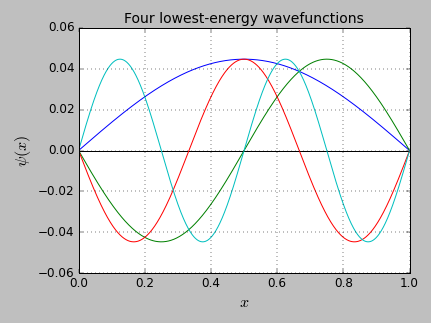

m =  0 , energy = 0.9999991775642157
m =  1 , energy = 3.9999868405631904
m =  2 , energy = 8.999933380415493
m =  3 , energy = 15.999789449575871


In [16]:
plt.figure()
plt.title("Four lowest-energy wavefunctions",fontsize=14)
plt.xlabel("$x$")
plt.ylabel("$\psi(x)$")
plt.axhline(0, color='black')     #draw x axis
plt.grid(True)

for m in range(4):
    y  = psi[m]
    #print(len(x), len(y))
    plt.plot(x,y)
    print('m = ',m,  ', energy =',vals[m])

#### Energies
$$
E^\prime = 1, 4. 9, 16, \dots \longrightarrow m^2
$$

or

$$ 
E = E^\prime \frac{h^2}{8ma^2} = m^2\frac{h^2}{8ma^2} = m^2 \frac{\pi^2\hbar^2}{2ma^2}
$$

#### Version information

+ `%version_information` is an IPython magic extension for showing version information for dependency modules in a notebook;

+ See https://github.com/jrjohansson/version_information

+ `%version_information` is available on Bucknell computers on the linux network. You can easily install it on any computer.

In [21]:
%load_ext version_information

In [22]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
scipy 1.5.0
matplotlib 3.2.2
Wed Dec 30 16:07:05 2020 EST